In [8]:
import pandas as pd
import numpy as np
import datetime
from pandas import read_html
import html5lib

# Plotly Method Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

# 1. Otwarcie notowań z pliku tekstowego i jego przygotowanie

In [9]:
# otwarcie plików tekstowych ze strony http://bossa.pl/notowania/metastock/
Bit = pd.read_csv('./DANE/11BIT.mst')
ART = pd.read_csv('./DANE/ARTIFEX.mst')
CDR = pd.read_csv('./DANE/CDPROJEKT.mst')
CIG = pd.read_csv('./DANE/CIGAMES.mst')
PLW = pd.read_csv('./DANE/PLAYWAY.mst')
TBL = pd.read_csv('./DANE/TBULL.mst')
TEN = pd.read_csv('./DANE/TSGAMES.mst')
VVD = pd.read_csv('./DANE/VIVID.mst')

In [10]:
# wyswietlenia nazw kolumn, w celu ich pozniejszej zmiany na Date,Open,High,Low,Close
TEN.columns

Index(['<TICKER>', '<DTYYYYMMDD>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>',
       '<VOL>'],
      dtype='object')

In [11]:
#słownik zawierajacy nowe nazwy dla kolumn
dict_Ticker={'<TICKER>':'Ticker', '<DTYYYYMMDD>':'Date', '<OPEN>':'Open', '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close',
       '<VOL>':'Volume'}

In [12]:
#metoda .rename zamienia nazwy kolumn wg słownika
Bit.rename(columns=dict_Ticker, inplace=True)
ART.rename(columns=dict_Ticker, inplace=True)
CDR.rename(columns=dict_Ticker, inplace=True)
CIG.rename(columns=dict_Ticker, inplace=True)
PLW.rename(columns=dict_Ticker, inplace=True)
TBL.rename(columns=dict_Ticker, inplace=True)
TEN.rename(columns=dict_Ticker, inplace=True)
VVD.rename(columns=dict_Ticker, inplace=True)

In [13]:
TEN.head()

Ticker      Date   Open  High    Low  Close  Volume
0  TSGAMES  20180511  52.20  63.0  51.11  62.00  200776
1  TSGAMES  20180514  68.00  74.8  65.30  66.70  240228
2  TSGAMES  20180515  66.60  66.6  58.28  62.00   93961
3  TSGAMES  20180516  63.50  63.9  60.01  63.67   34008
4  TSGAMES  20180517  63.87  63.9  59.00  59.00   24068

In [14]:
#Zmiana typu kolumny date na typ znacznika czasowego
Bit['Date']=pd.to_datetime(Bit['Date'],format="%Y%m%d")
ART['Date']=pd.to_datetime(ART['Date'],format="%Y%m%d")
CDR['Date']=pd.to_datetime(CDR['Date'],format="%Y%m%d")
CIG['Date']=pd.to_datetime(CIG['Date'],format="%Y%m%d")
PLW['Date']=pd.to_datetime(PLW['Date'],format="%Y%m%d")
TBL['Date']=pd.to_datetime(TBL['Date'],format="%Y%m%d")
TEN['Date']=pd.to_datetime(TEN['Date'],format="%Y%m%d")
VVD['Date']=pd.to_datetime(VVD['Date'],format="%Y%m%d")

In [15]:
# zmiana typu kolumn z obiect na float
Bit[['Open','High','Low','Close']] = Bit[['Open','High','Low','Close']].astype('float')
ART[['Open','High','Low','Close']] = ART[['Open','High','Low','Close']].astype('float')
CDR[['Open','High','Low','Close']] = CDR[['Open','High','Low','Close']].astype('float')
CIG[['Open','High','Low','Close']] = CIG[['Open','High','Low','Close']].astype('float')
PLW[['Open','High','Low','Close']] = PLW[['Open','High','Low','Close']].astype('float')
TBL[['Open','High','Low','Close']] = TBL[['Open','High','Low','Close']].astype('float')
TEN[['Open','High','Low','Close']] = TEN[['Open','High','Low','Close']].astype('float')
VVD[['Open','High','Low','Close']] = VVD[['Open','High','Low','Close']].astype('float')

In [16]:
# usuniecie kolumnu o nazwie Ticker
Bit.drop(axis=1,columns=['Ticker'], inplace=True)
ART.drop(axis=1,columns=['Ticker'], inplace=True)
CDR.drop(axis=1,columns=['Ticker'], inplace=True)
CIG.drop(axis=1,columns=['Ticker'], inplace=True)
PLW.drop(axis=1,columns=['Ticker'], inplace=True)
TBL.drop(axis=1,columns=['Ticker'], inplace=True)
TEN.drop(axis=1,columns=['Ticker'], inplace=True)
VVD.drop(axis=1,columns=['Ticker'], inplace=True)

In [17]:
VVD.head()

Date  Open  High   Low  Close  Volume
0 2012-06-11  0.39  0.39  0.29   0.30  304634
1 2012-06-12  0.32  0.32  0.20   0.20  250051
2 2012-06-13  0.20  0.24  0.20   0.21   34678
3 2012-06-14  0.23  0.28  0.23   0.25   55620
4 2012-06-15  0.29  0.29  0.24   0.25   61202

In [18]:
# reset standardowego indexu, nie usuwa tej kolumny
Bit.reset_index()
ART.reset_index()
CDR.reset_index()
CIG.reset_index()
PLW.reset_index()
TBL.reset_index()
TEN.reset_index()
VVD.reset_index()

index       Date   Open   High    Low  Close  Volume
0         0 2012-06-11  0.390  0.390  0.290  0.300  304634
1         1 2012-06-12  0.320  0.320  0.200  0.200  250051
2         2 2012-06-13  0.200  0.240  0.200  0.210   34678
3         3 2012-06-14  0.230  0.280  0.230  0.250   55620
4         4 2012-06-15  0.290  0.290  0.240  0.250   61202
5         5 2012-06-18  0.240  0.260  0.230  0.230    7249
6         6 2012-06-19  0.250  0.250  0.240  0.250   16143
7         7 2012-06-20  0.250  0.260  0.250  0.250    2200
8         8 2012-06-21  0.250  0.260  0.250  0.260     491
9         9 2012-06-22  0.260  0.260  0.260  0.260     185
10       10 2012-06-25  0.260  0.260  0.260  0.260     161
11       11 2012-06-26  0.250  0.250  0.250  0.250    1000
12       12 2012-06-27  0.240  0.240  0.230  0.240   18110
13       13 2012-06-28  0.250  0.250  0.250  0.250  101176
14       14 2012-06-29  0.250  0.250  0.250  0.250     600
15       15 2012-07-02  0.250  0.260  0.240  0.240    5300
16       16 2012-07-03  0.240  0.240  0.240  0.240   12357
17       17 2012-07-04  0.240  0.240  0.240  0.240     800
18       18 2012-07-05  0.240  0.240  0.240  0.240    1000
19       19 2012-07-06  0.250  0.250  0.230  0.230    3550
20       20 2012-07-09  0.230  0.230  0.230  0.230   13688
21       21 2012-07-10  0.220  0.230  0.220  0.230    9305
22       22 2012-07-11  0.230  0.240  0.230  0.240     320
23       23 2012-07-12  0.240  0.240  0.240  0.240    3001
24       24 2012-07-17  0.230  0.230  0.230  0.230    4958
25       25 2012-07-18  0.230  0.230  0.210  0.230  161420
26       26 2012-07-25  0.230  0.240  0.230  0.240    2524
27       27 2012-07-26  0.230  0.230  0.230  0.230    5738
28       28 2012-07-31  0.230  0.230  0.230  0.230    6168
29       29 2012-08-03  0.230  0.230  0.220  0.230   10100
...     ...        ...    ...    ...    ...    ...     ...
1798   1798 2019-09-20  1.290  1.290  1.270  1.280    7791
1799   1799 2019-09-23  1.262  1.300  1.262  1.300   49213
1800   1800 2019-09-24  1.310  1.320  1.300  1.316    8678
1801   1801 2019-09-25  1.316  1.520  1.316  1.370  315194
1802   1802 2019-09-26  1.370  1.370  1.320  1.368   49539
1803   1803 2019-09-27  1.340  1.398  1.330  1.330   24820
1804   1804 2019-09-30  1.330  1.348  1.280  1.280   38791
1805   1805 2019-10-01  1.270  1.346  1.270  1.300   28475
1806   1806 2019-10-02  1.280  1.280  1.200  1.210   24618
1807   1807 2019-10-03  1.250  1.250  1.200  1.250   27278
1808   1808 2019-10-04  1.250  1.310  1.250  1.310   19284
1809   1809 2019-10-07  1.320  1.338  1.212  1.310   16792
1810   1810 2019-10-08  1.300  1.310  1.280  1.306    3620
1811   1811 2019-10-09  1.306  1.308  1.270  1.300    6610
1812   1812 2019-10-10  1.250  1.300  1.250  1.260   14275
1813   1813 2019-10-11  1.260  1.310  1.230  1.240   54891
1814   1814 2019-10-14  1.288  1.288  1.230  1.230    8515
1815   1815 2019-10-15  1.270  1.290  1.230  1.232   53850
1816   1816 2019-10-16  1.230  1.290  1.230  1.286   40519
1817   1817 2019-10-17  1.280  1.280  1.240  1.270   19729
1818   1818 2019-10-18  1.250  1.270  1.230  1.260   15518
1819   1819 2019-10-21  1.240  1.290  1.232  1.288   22915
1820   1820 2019-10-22  1.290  1.290  1.258  1.276   31891
1821   1821 2019-10-23  1.276  1.276  1.234  1.236   24404
1822   1822 2019-10-24  1.250  1.270  1.250  1.250   23244
1823   1823 2019-10-25  1.250  1.270  1.242  1.260    9266
1824   1824 2019-10-28  1.250  1.280  1.250  1.280   16859
1825   1825 2019-10-29  1.262  1.388  1.260  1.380   71017
1826   1826 2019-10-30  1.430  1.440  1.308  1.312   64415
1827   1827 2019-10-31  1.350  1.350  1.230  1.290   29368

[1828 rows x 7 columns]

In [19]:
#Ustawienia kolumny Date jako nowy index
Bit.set_index(keys='Date',inplace=True)
ART.set_index(keys='Date',inplace=True)
CDR.set_index(keys='Date',inplace=True)
CIG.set_index(keys='Date',inplace=True)
PLW.set_index(keys='Date',inplace=True)
TBL.set_index(keys='Date',inplace=True)
TEN.set_index(keys='Date',inplace=True)
VVD.set_index(keys='Date',inplace=True)

In [20]:
CDR.head()

Open  High   Low  Close  Volume
Date                                       
1994-08-02  40.0  40.0  40.0   40.0   71824
1994-08-03  44.0  44.0  44.0   44.0   67228
1994-08-04  48.4  48.4  48.4   48.4   73432
1994-08-08  44.0  44.0  44.0   44.0   54500
1994-08-09  52.0  52.0  52.0   52.0   27962

# 2. Przeglądanie danych

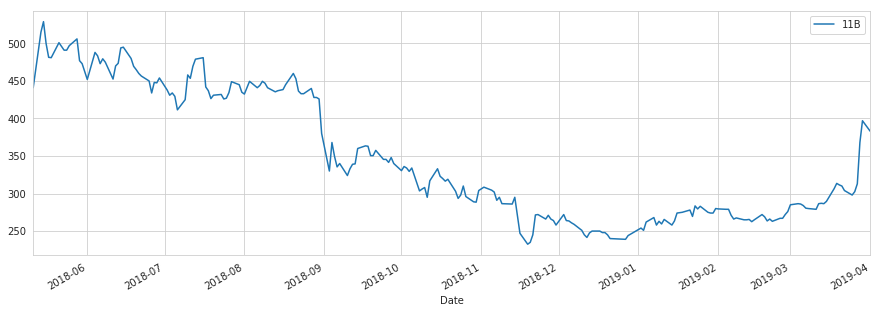

In [30]:
Bit.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='11B')
#ART.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='ART')
#CDR.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='CDR')
#CIG.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='CIG')
#PLW.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='PLW')
#TBL.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='TBL')
#TEN.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='TEN')
#VVD.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='VVD')
plt.legend()

In [22]:
spolki_gamingowe = ['11B','ART','CDR','CIG','PLW','TBL','TEN','VVD']

In [23]:
start_okres = '2018-05-11'

In [24]:
gaming_stock = pd.concat([Bit.loc[start_okres:],ART.loc[start_okres:],CDR.loc[start_okres:],CIG.loc[start_okres:],PLW.loc[start_okres:],TBL.loc[start_okres:],
TEN.loc[start_okres:],VVD.loc[start_okres:]],axis=1,keys=spolki_gamingowe)

In [25]:
gaming_stock.columns.names = ['Gaming Ticker','Stock Info']

In [26]:
gaming_stock.xs(key='Close',axis=1,level='Stock Info').max()

Gaming Ticker
11B    529.00
ART      9.30
CDR    260.00
CIG      1.54
PLW    200.00
TBL     85.00
TEN    164.40
VVD      6.12
dtype: float64

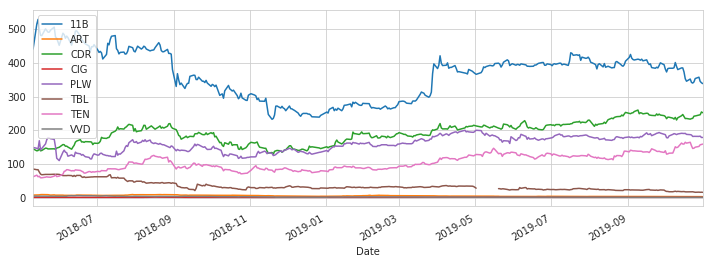

In [27]:
for tick in spolki_gamingowe:
    gaming_stock[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend(loc='upper left')

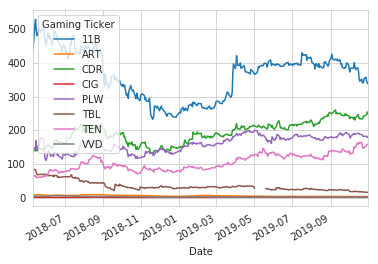

In [28]:
gaming_stock.xs(key='Close', axis=1,level='Stock Info').plot()

In [29]:
gaming_stock.xs(key='Close', axis=1,level='Stock Info').iplot()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'bgcolor' property of layout.legend
        Received value: 'pearl02'

    The 'bgcolor' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen

In [31]:
returns = pd.DataFrame()

In [32]:
for tick in spolki_gamingowe:
    returns[tick+' Return'] = gaming_stock[tick]['Close'].pct_change()
returns.head()

11B Return  ART Return  CDR Return  CIG Return  PLW Return  \
Date                                                                     
2018-05-11         NaN         NaN         NaN         NaN         NaN   
2018-05-14    0.167800    0.051948   -0.041379    0.052632   -0.016779   
2018-05-15    0.027184    0.009877    0.005755   -0.020000   -0.013652   
2018-05-16   -0.054820    0.014670    0.037196    0.000000    0.169550   
2018-05-17   -0.037000    0.081928   -0.041379   -0.010204   -0.159763   

            TBL Return  TEN Return  VVD Return  
Date                                            
2018-05-11         NaN         NaN         NaN  
2018-05-14   -0.023529    0.075806   -0.017621  
2018-05-15    0.000000   -0.070465    0.000000  
2018-05-16   -0.084337    0.026935   -0.002242  
2018-05-17   -0.078947   -0.073347   -0.015730

In [33]:
returns.min()

11B Return   -0.131579
ART Return   -0.129412
CDR Return   -0.105321
CIG Return   -0.205882
PLW Return   -0.225166
TBL Return   -0.185714
TEN Return   -0.160908
VVD Return   -0.345361
dtype: float64

In [34]:
returns.loc['2018-04-01':'2019-04-01'].std()

11B Return    0.035914
ART Return    0.039195
CDR Return    0.030908
CIG Return    0.048608
PLW Return    0.043070
TBL Return    0.058126
TEN Return    0.038545
VVD Return    0.061802
dtype: float64

In [35]:
Bit.loc['2018-05-11':].head(5)

Open   High    Low  Close  Volume
Date                                          
2018-05-11  393.0  441.0  387.5  441.0   64688
2018-05-14  459.5  518.0  458.5  515.0  118059
2018-05-15  505.0  548.0  484.0  529.0   61873
2018-05-16  530.0  540.0  495.0  500.0   44254
2018-05-17  498.0  499.0  461.5  481.5   53740

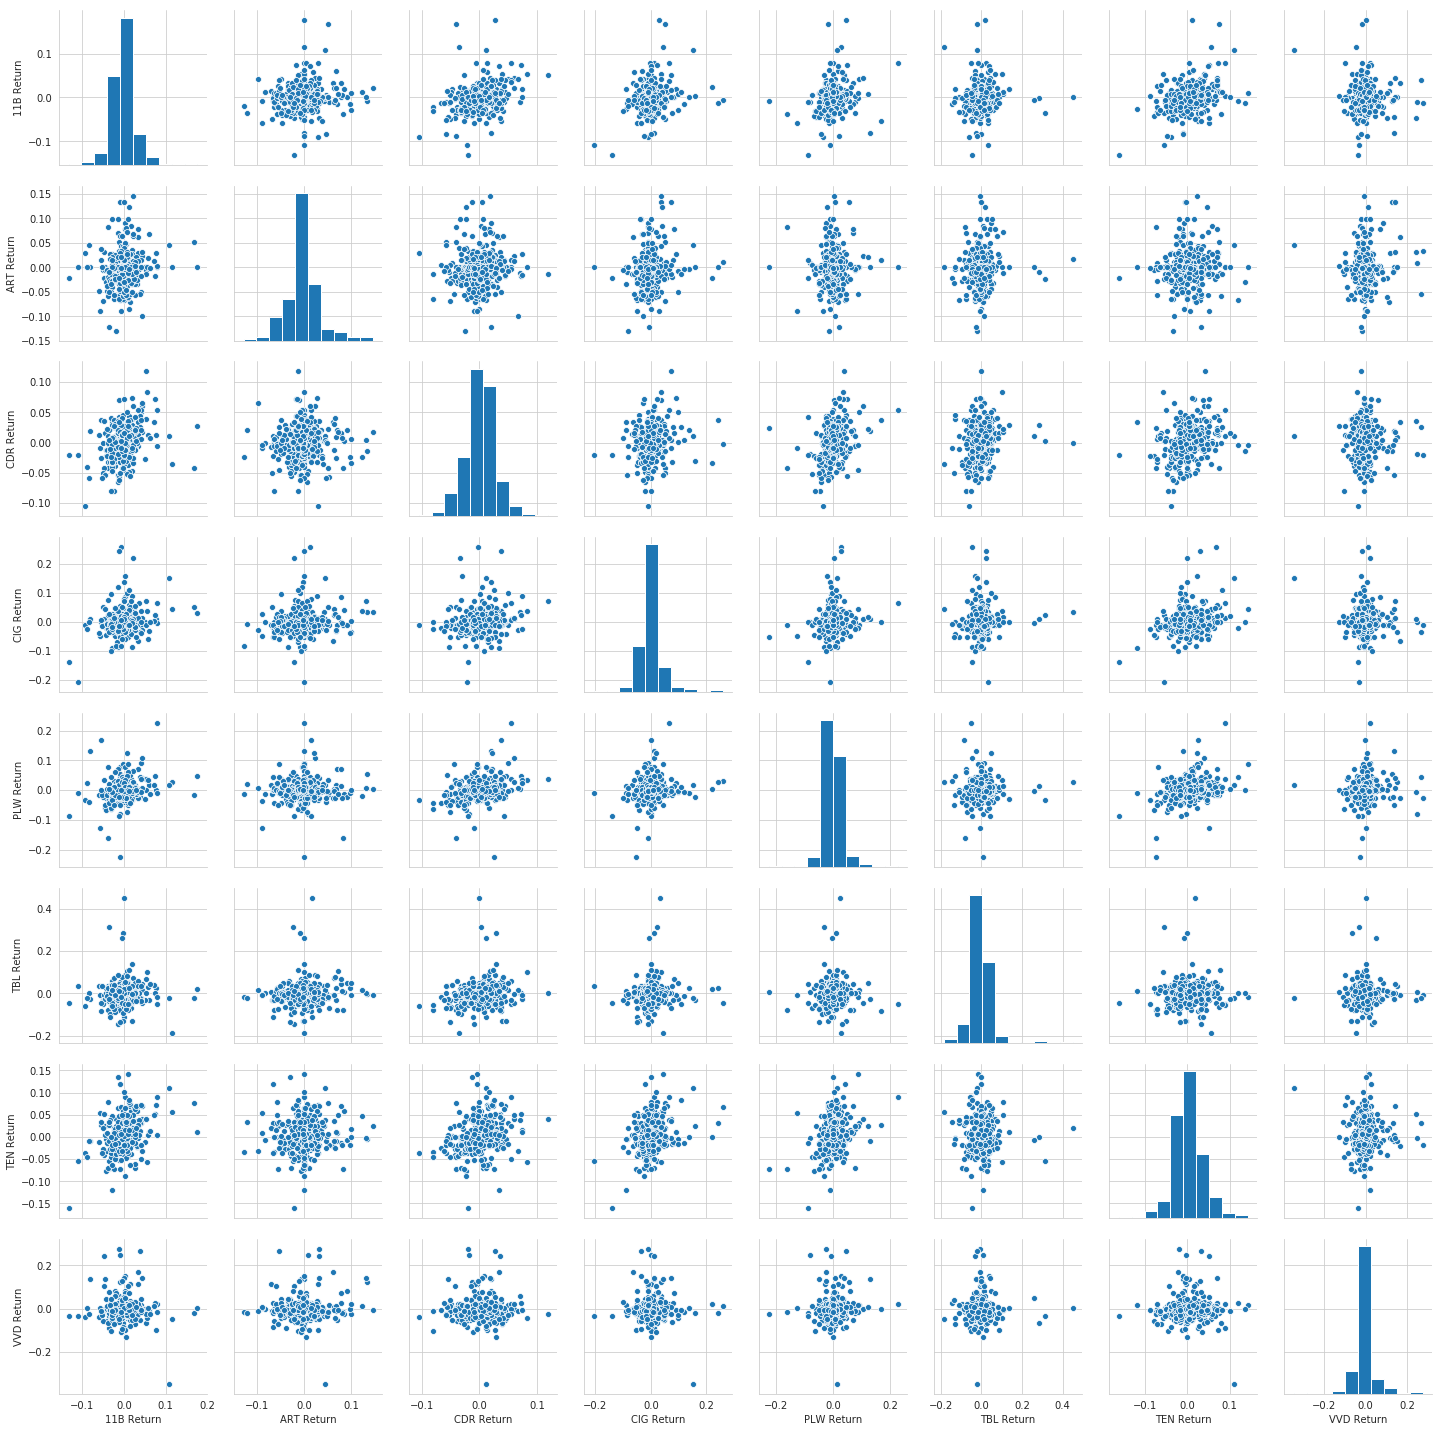

In [36]:
sns.pairplot(returns[1:])

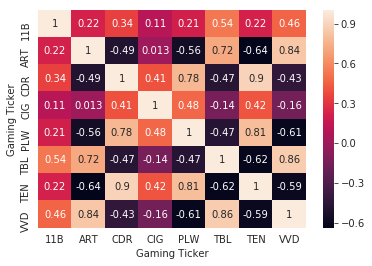

In [37]:
sns.heatmap(gaming_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [38]:
close_cor = gaming_stock.xs(key='Close',axis=1,level='Stock Info').corr()

In [39]:
close_cor.iplot(kind='heatmap',colorscale='rdylbu')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'bgcolor' property of layout.legend
        Received value: 'pearl02'

    The 'bgcolor' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen

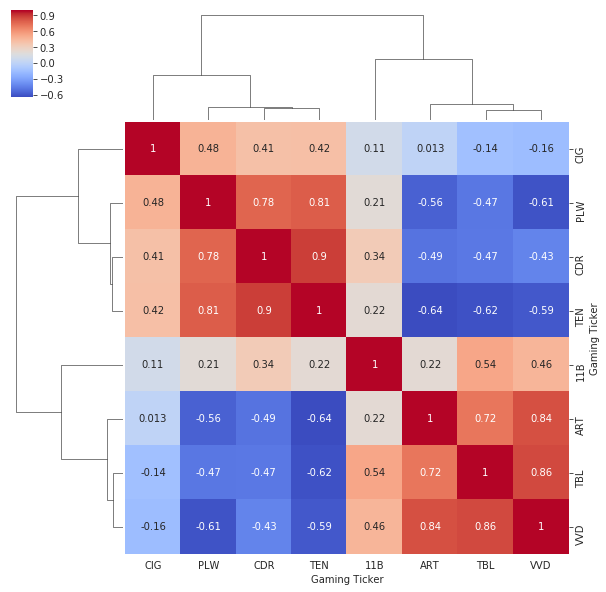

In [40]:
sns.clustermap(gaming_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='coolwarm')

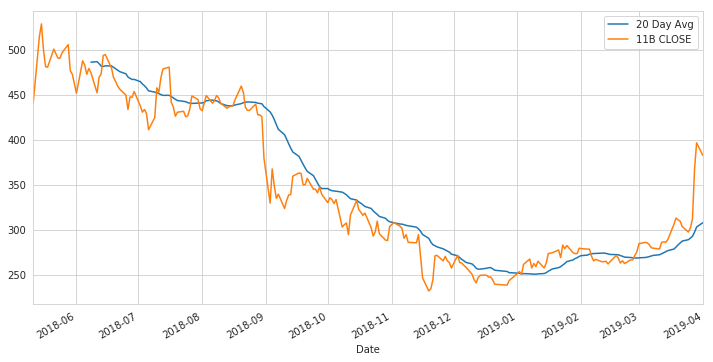

In [41]:
plt.figure(figsize=(12,6))
Bit['Close'].loc[start_okres:'2019-04-01'].rolling(window=20).mean().plot(label='20 Day Avg')
Bit['Close'].loc[start_okres:'2019-04-01'].plot(label='11B CLOSE')
plt.legend()

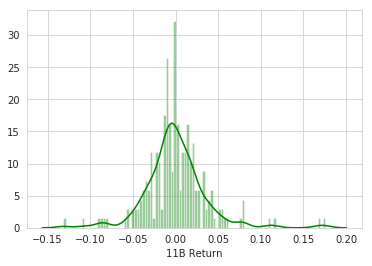

In [42]:
sns.distplot(returns.loc['2018-05-14':'2019-04-01']['11B Return'],color='green',bins=100)

In [43]:
Bit[['Open', 'High', 'Low', 'Close']].loc['2018-05-11':'2019-04-01'].iplot(kind='candle')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'bgcolor' property of layout.legend
        Received value: 'pearl02'

    The 'bgcolor' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen

In [44]:
Bit['Close'].loc['2018-06-01':'2019-04-01'].ta_plot(study='sma',periods=[13,21,55])

ValueError: 
    Invalid value of type 'builtins.str' received for the 'bgcolor' property of layout.legend
        Received value: 'pearl02'

    The 'bgcolor' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen

# Bollinger Bands

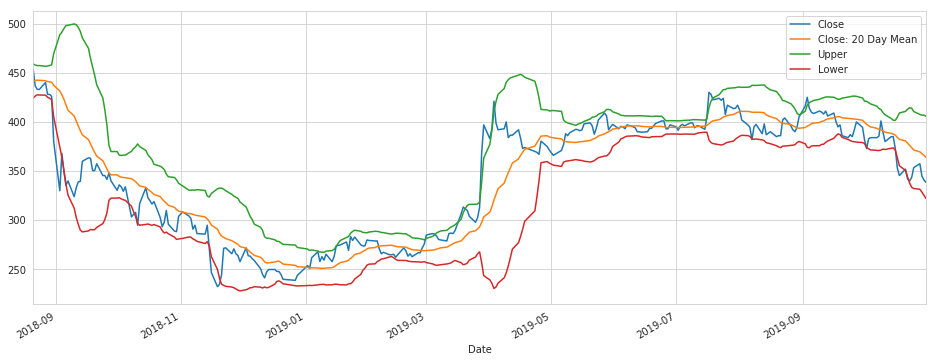

In [45]:
#close 20MA
Bit['Close: 20 Day Mean'] = Bit['Close'].rolling(20).mean()
#upper = 20MA + 2 * std(20)
Bit['Upper'] = Bit['Close: 20 Day Mean']+2*(Bit['Close'].rolling(20).std())
#lower = 20MA + 2 * std(20 )
Bit['Lower'] = Bit['Close: 20 Day Mean']-2*(Bit['Close'].rolling(20).std())
#Close
Bit[['Close','Close: 20 Day Mean','Upper','Lower']].tail(300).plot(figsize=(16,6))